# Iterative solvers, numerical study of convergence

Author(s): Jukka.Aho <jukka.aho@kapsi.fi>

##Abstract



In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
N = 200
A = N*full(Tridiagonal(-ones(N-1), 2*ones(N), -1*ones(N-1)))
A[end,end] -= N
b = -1/N*ones(N)
b[end] += 1 + 1/(2*N)
x_true = A\b
println("endpoint of true solution: ", x_true[end])
rnorm = norm(A\b, 2)
println("Reference norm: ", rnorm)

endpoint of true solution: 0.5000000000000506
Reference norm: 3.182045987352757


## Jacobi method

In [3]:
function solve_Jacobi(A, b, max_iterations=3000)
    N = length(b)
    R = A-diagm(diag(A))
    invD = diagm(1./diag(A))
    x = zeros(N)
    norms = []
    for i=1:max_iterations
        x = invD*(b-R*x)
        norms = [norms; norm(x)]
    end
    return x, norms
end
x_jacobi, norms_jacobi = solve_Jacobi(A, b);

## Richardson method

- is equivalent with deepest descent method for min 1/2*x'*A*x - b'x

In [4]:
function solve_Richardson(A, b, max_iterations=3000)
    N = length(b)
    x = zeros(N)
    norms = []
    la = sort(eigvals(A), rev=true)
    wopt = 2/(maximum(la)+minimum(la))
    # modification, remove wave of smallest and largest eigenvalue because they are anyway calculated.
    # this increases convergence a bit
    for i = 1:1
        x = x - 1/la[i]*(A*x - b)
        x = x - 1/la[end-i]*(A*x - b)
    end
    for i=1:max_iterations
        x = x - wopt*(A*x - b)
        norms = [norms; norm(x)]
    end
    return x, norms
end

x_richardson, norms_richardson = solve_Richardson(A, b);

## Conjugate gradient
## Successive over-relaxation
## GMRES
## MINRES

## Summary

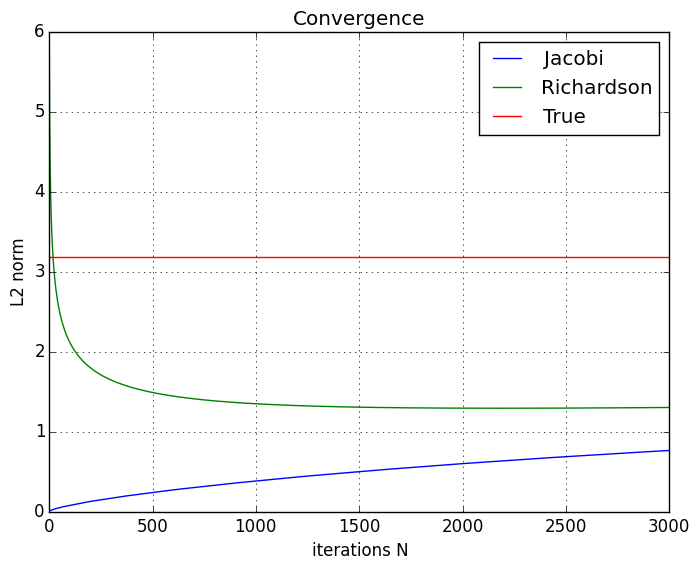

In [5]:
plot(norms_jacobi, label="Jacobi")
plot(norms_richardson, label="Richardson")
plot([0, length(norms_jacobi)], [rnorm, rnorm], label="True")
#ylim(0, 5)
legend()
title("Convergence")
xlabel("iterations N")
ylabel("L2 norm")
grid()

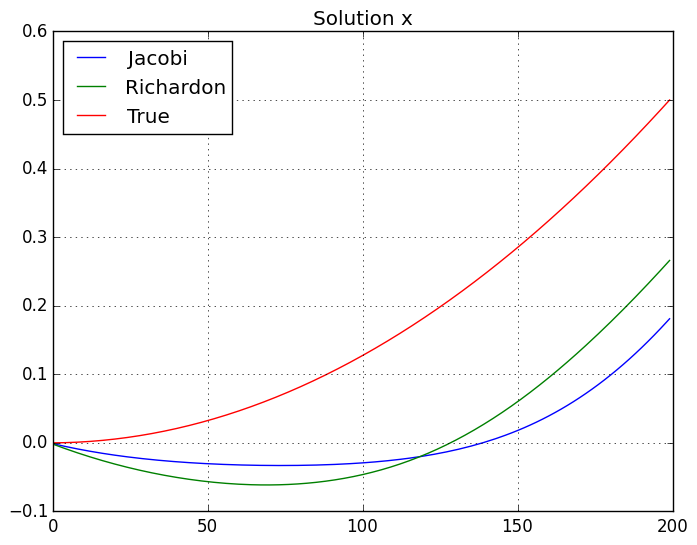

In [6]:
plot(x_jacobi, label="Jacobi")
plot(x_richardson, label="Richardon")
plot(A\b, label="True")
legend(loc="best")
title("Solution x")
grid()